In [1]:
# https://blog.naver.com/dalgoon02121/222051184805
# https://youngwonhan-family.tistory.com/66   ---  konlpy, kkma, jpype issue

In [1]:
import scipy as sp
import pandas as pd
import numpy as np
import konlpy
konlpy.jvm.init_jvm(jvmpath=None, max_heap_size=10240)

from konlpy.tag import Kkma        ; kkma = Kkma()
from konlpy.tag import Hannanum    ; hannanum = Hannanum()
from konlpy.tag import Okt         ; t = Okt()     # 구 트위터
from konlpy.tag import *

import nltk
import pickle

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


import os
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.tree import export_graphviz

import matplotlib.font_manager as fm
plt.rc('font', family='NanumGothic')

import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')


In [14]:
news_df = pd.read_csv('./without_name/EDA_headlines.tsv', sep="\t")

In [13]:
news_df = pd.read_csv('./without_name/EDA_headlines.tsv', sep="\t")
title_list = news_df.뉴스제목.values.tolist()
title_text = ''
for each_line in title_list:
    title_text = title_text + each_line + '\n'



KeyboardInterrupt: 

In [2]:
# with open('without_title_text.pkl', 'wb') as f:
#     pickle.dump(title_text, f)


with open('./without_name/without_title_text.pkl', 'rb') as f:
    title_text = pickle.load(f)

In [3]:
tokens_ko = t.morphs(title_text)
ko = nltk.Text(tokens_ko)
print("토큰 전체 개수: ", len(ko.tokens))          # 토큰 전체 개수
print("토큰 unique 개수: ", len(set(ko.tokens)))     # 토큰 unique 개수


6895680
81670


[('투자', 37293), ('영업', 24317), ('뉴스', 22967), ('출시', 21193), ('ET', 18789), ('실적', 18666), ('증권', 18394), ('↑', 16986), ('사업', 16942), ('상승', 15652), ('코로나', 14229), ('시장', 13715), ('기업', 13220), ('목표', 13038), ('대비', 13012), ('규모', 13001), ('BUY', 12663), ('건설', 12434), ('위', 12374), ('삼성', 12107), ('매출', 10717), ('개발', 10705), ('전일', 10524), ('이익', 10170), ('거래', 10041), ('지원', 10008), ('판매', 9831), ('주가', 9640), ('계약', 9614), ('수주', 9198), ('최대', 9133), ('년', 9070), ('전자', 8932), ('19', 8851), ('美', 8835), ('유지', 8827), ('첫', 8777), ('서비스', 8761), ('↓', 8422), ('한국', 8219), ('SK', 8089), ('확대', 8074), ('화', 8004), ('공급', 7982), ('그룹', 7871), ('회장', 7720), ('글로벌', 7517), ('매수', 7501), ('종합', 7483), ('성장', 7422), ('현대', 7248), ('공장', 7242), ('인수', 7210), ('LG', 7203), ('협력', 7152), ('체결', 6980), ('개최', 6963), ('2분', 6963), ('1분', 6884), ('올해', 6829), ('기대', 6761), ('比', 6757), ('증가', 6592), ('롯데', 6553), ('개선', 6457), ('경영', 6444), ('하락', 6394), ('수상', 6326), ('치료', 6110), ('진행', 6104

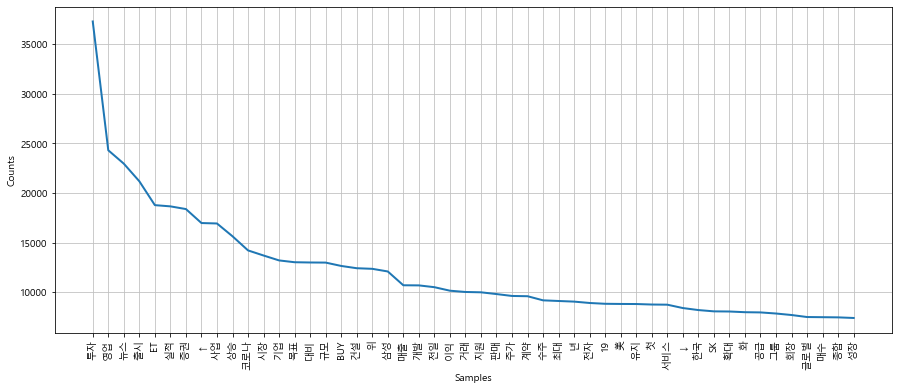

In [10]:

stop_words = ['··',"''",'),','(-',')-','",','],','\n ',\
              '\n',"'",'…',',','[',']','(',')','"','주','에','코스닥','특징','종목','·','장','코스피','증시','-','적',\
              '도','기술','분석','마감','‘','`','요약','가','’','의','이','오전','★','은','“','대','”','한','B','로',\
              '?','3','선','A','오후','는','5','!','"…','상','들','1','만에','제','2','…"','20','일','서','명',"'…",'기',\
              '···','10','소','등','으로','자','전','률','미','...','50','세','시','안','폭',"…'",'만','9','VI','까지',\
              '눈','더','e','량','고','인','52','성','띄네','1%','부터','다','감','을','지','4','에도','수','7','것','째',\
             '체크','기','···','중','계','관련','왜','1억원','총','내','과','젠','또','연','엔','차','굿모닝','할','8','.',\
             '보다','새','주간','전망','추천','이슈','플러스','사','개월','때','..','임','속','’…','G','나','개','원','에서',\
             '하는','이유','달','→','권','?…','단독','간','배','30','K','저','와','하','/','1조','6','두','해야','분','형',\
             '황','공','&','앞두고','보','문','이번','익','X','1억',']"','치','산','를','오','해','S','우리','그','된','준','▶',\
             '건','재','반','라','10년','초','3분','월','신','p','급','조','줄','경','했다','구','진','이어','올','발','vs','강',\
             '국','9억','1년','난','판','면','"(','`…','살','아','인데','번','텍','팜','8월','Q','메','2년','점','하고','10월',\
             'D','비','됐다','채',"]'",'보니','손','확','종','동','팔','40','타','~','9월','2100','30%','땐','말','한다','요',\
             "',",'스','…`','단','16','길','12','3억','회','될까','호','용','2조','번째','일까','듯','최']

tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]
ko = nltk.Text(tokens_ko)

print(ko.vocab().most_common(200))

# 그래프에서 한글 폰트가 깨질 경우 실행
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

plt.figure(figsize=(15,6))
ko.plot(50)
plt.show()


In [11]:
# 형태소 분석을 위한 함수
def tokenizer(text):
    okt = Okt()
    return okt.morphs(text)

def data_preprocessing():
    # 수집한 데이터 읽어오기
    # news_df = pd.read_excel()
    # 학습셋, 테스트셋 분리
    title_list = news_df['뉴스제목'].tolist()
    price_list = news_df['주가변동'].tolist()
    # 데이터의 80%는 학습셋, 20%는 테스트셋
    title_train, title_test, price_train, price_test = train_test_split(title_list, price_list, test_size=0.2, random_state=0)
    return title_train, title_test, price_train, price_test

def learning(x_train, y_train, x_test, y_test):
    # 전처리가 끝난 데이터를 단어 사전으로 만들고
    # 리뷰별로 나오는 단어를 파악해서 수치화 (벡터화)해서 학습
    # tfidf, 로지스틱 회귀 이용
    tfidf = TfidfVectorizer(lowercase=False, tokenizer=tokenizer)
    # 로지스틱
    logistic = LogisticRegression(C=2, penalty='l2', random_state=0, verbose=1)     # C의 숫자가 너무 크면 과적합 (기본 1), penalty로 과적합 방지
    pipe = Pipeline([('vect',tfidf),('clf',logistic)])
    # 학습
    pipe.fit(x_train, y_train)
    # 학습 정확도 측정
    y_pred = pipe.predict(x_test)
    print(accuracy_score(y_test, y_pred))
    # 학습한 모델을 저장
    with open('./saved_models/LogiReg/pipe.dat', 'wb') as fp:     # 쓰기, 바탕화면에 저장됨
        pickle.dump(pipe, fp)
    print('저장완료')     # 학습된 모델 저장 완료

def using():
    # 객체를 복원, 저장된 모델 불러오기
    with open('./saved_models/LogiReg/pipe.dat','rb') as fp:     # 읽기
        pipe = pickle.load(fp)
    while True :
        text = input('뉴스 타이틀을 입력해주세요 : ')
        str = [text]
        # 예측 정확도
        r1 = np.max(pipe.predict_proba(str)*100)     # 확률값을 구해서 *100
        # 예측 결과
        r2 = pipe.predict(str)[0]     # 긍정('1'), 부정('0')
        if r2 == '1':
            print('코스피지수는 상승할 것으로 예상됩니다.')
        else: 
            print('코스피지수는 하락할 것으로 예상됩니다.')
        print('정확도 : %.3f' % r1)
        print('------------------------------------------------')


In [15]:
# 학습 함수
def model_learning():   # 감성분석 모델 생성
    title_train, title_test, price_train, price_test = data_preprocessing()
    learning(title_train, price_train, title_test, price_test)
    
# 사용 함수
def model_using():   # 감성분석 모델 사용
    using()

model_learning()



0.5940006081106761
저장완료


In [17]:
model_using()

코스피지수는 하락할 것으로 예상됩니다.
정확도 : 52.208
------------------------------------------------
코스피지수는 하락할 것으로 예상됩니다.
정확도 : 60.870
------------------------------------------------
코스피지수는 하락할 것으로 예상됩니다.
정확도 : 75.313
------------------------------------------------
코스피지수는 하락할 것으로 예상됩니다.
정확도 : 58.836
------------------------------------------------
코스피지수는 하락할 것으로 예상됩니다.
정확도 : 52.185
------------------------------------------------
코스피지수는 하락할 것으로 예상됩니다.
정확도 : 50.152
------------------------------------------------
코스피지수는 하락할 것으로 예상됩니다.
정확도 : 51.806
------------------------------------------------


KeyboardInterrupt: Interrupted by user